<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 18: Numerical ODE Simulations Part II</h1>


<a name='section_18_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L18.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_18_1">L18.1 Bifurcation Diagrams and Chaotic Motion</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_18_1">L18.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_18_2">L18.2 Numerical Precision and Chaotic Dynamics</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_18_2">L18.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_18_3">L18.3 Machine Learning the Pendulum Part I</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_18_3">L18.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_18_4">L18.4 Machine Learning the Pendulum Part II</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_18_4">L18.4 Exercises</a></td>
    </tr>
</table>

In [1]:
#>>>RUN: L18.0-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L18' >> .git/info/sparse-checkout
!git pull origin main

#NOTE: must create L18 directory on github

Initialized empty Git repository in /Users/josemanuelplaza/Documents/8.S50-MITx-Computational-Physics/8.S50.3x - Computational Data Science in Physics III/Numerical ODE Simulations/Lesson 18- Numerical ODE Simulations Part II/.git/
Updating origin
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 713 (delta 88), reused 79 (delta 62), pack-reused 529 (from 1)
Receiving objects: 100% (713/713), 37.17 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (339/339), done.
From https://github.com/mitx-8s50/nb_LEARNER
 * [new branch]      Alex       -> origin/Alex
 * [new branch]      main       -> origin/main
From https://github.com/mitx-8s50/nb_LEARNER
 * branch            main       -> FETCH_HEAD


In [2]:
#>>>RUN: L18.0-runcell01

#you may need to install this package (it already available in Colab)
#!pip install imageio    #https://imageio.readthedocs.io/en/stable/

In [3]:
#>>>RUN: L18.0-runcell02

import imageio                        #https://imageio.readthedocs.io/en/stable/
from PIL import Image                 #https://pillow.readthedocs.io/en/stable/reference/Image.html

import numpy as np                    #https://numpy.org/doc/stable/
import torch                          #https://pytorch.org/docs/stable/torch.html
import torch.nn as nn                 #https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt       #https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot
import warnings

from scipy.integrate import odeint    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
from scipy.optimize import minimize   #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
import csv                            #https://docs.python.org/3/library/csv.html
from matplotlib.patches import Circle #https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html
from scipy.integrate import solve_ivp #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
from IPython.display import Image     #https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

In [4]:
#>>>RUN: L18.0-runcell02
warnings.filterwarnings('ignore')

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<a name='section_18_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L18.1 Bifurcation Diagrams and Chaotic Motion</h2>  

| [Top](#section_18_0) | [Previous Section](#section_18_0) | [Exercises](#exercises_18_1) | [Next Section](#section_18_2) |


Text(0.5, 1.0, 'Bifurcation diagram')

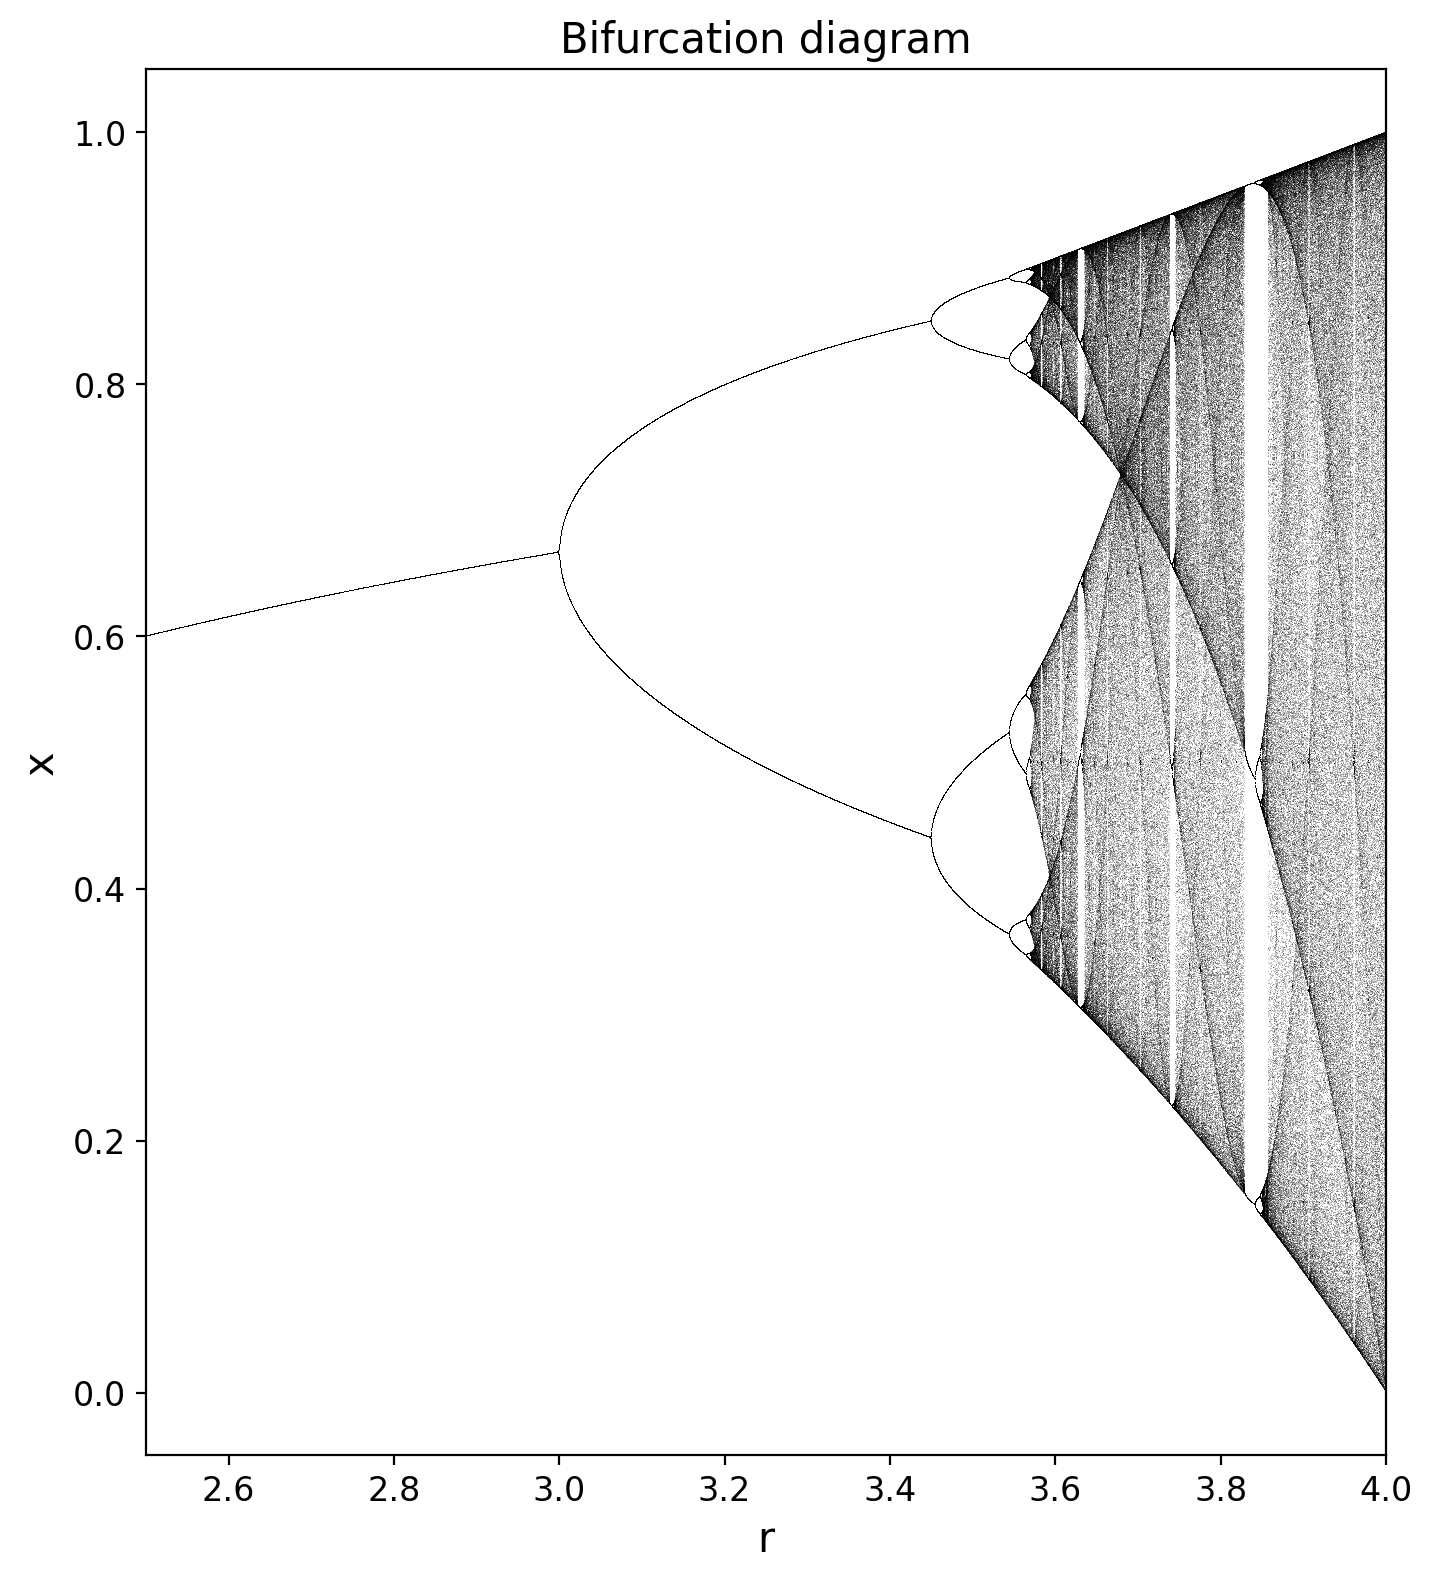

In [5]:
#>>>RUN: L18.1-runcell01

def logistic(r, x):
    return r * x * (1 - x)

#vary parameters to change density of points
iterations=2000
last = 200
n = 10000
r = np.linspace(2.5, 4.0, n)
x = 1e-5 * np.ones(n)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 9),sharex=True)
for i in range(iterations):
    x = logistic(r, x)   
    # We compute the partial sum of the
    # Lyapunov exponent.<a name='section_15_2'></a>
    #lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlabel('r')
ax1.set_ylabel('x')
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")


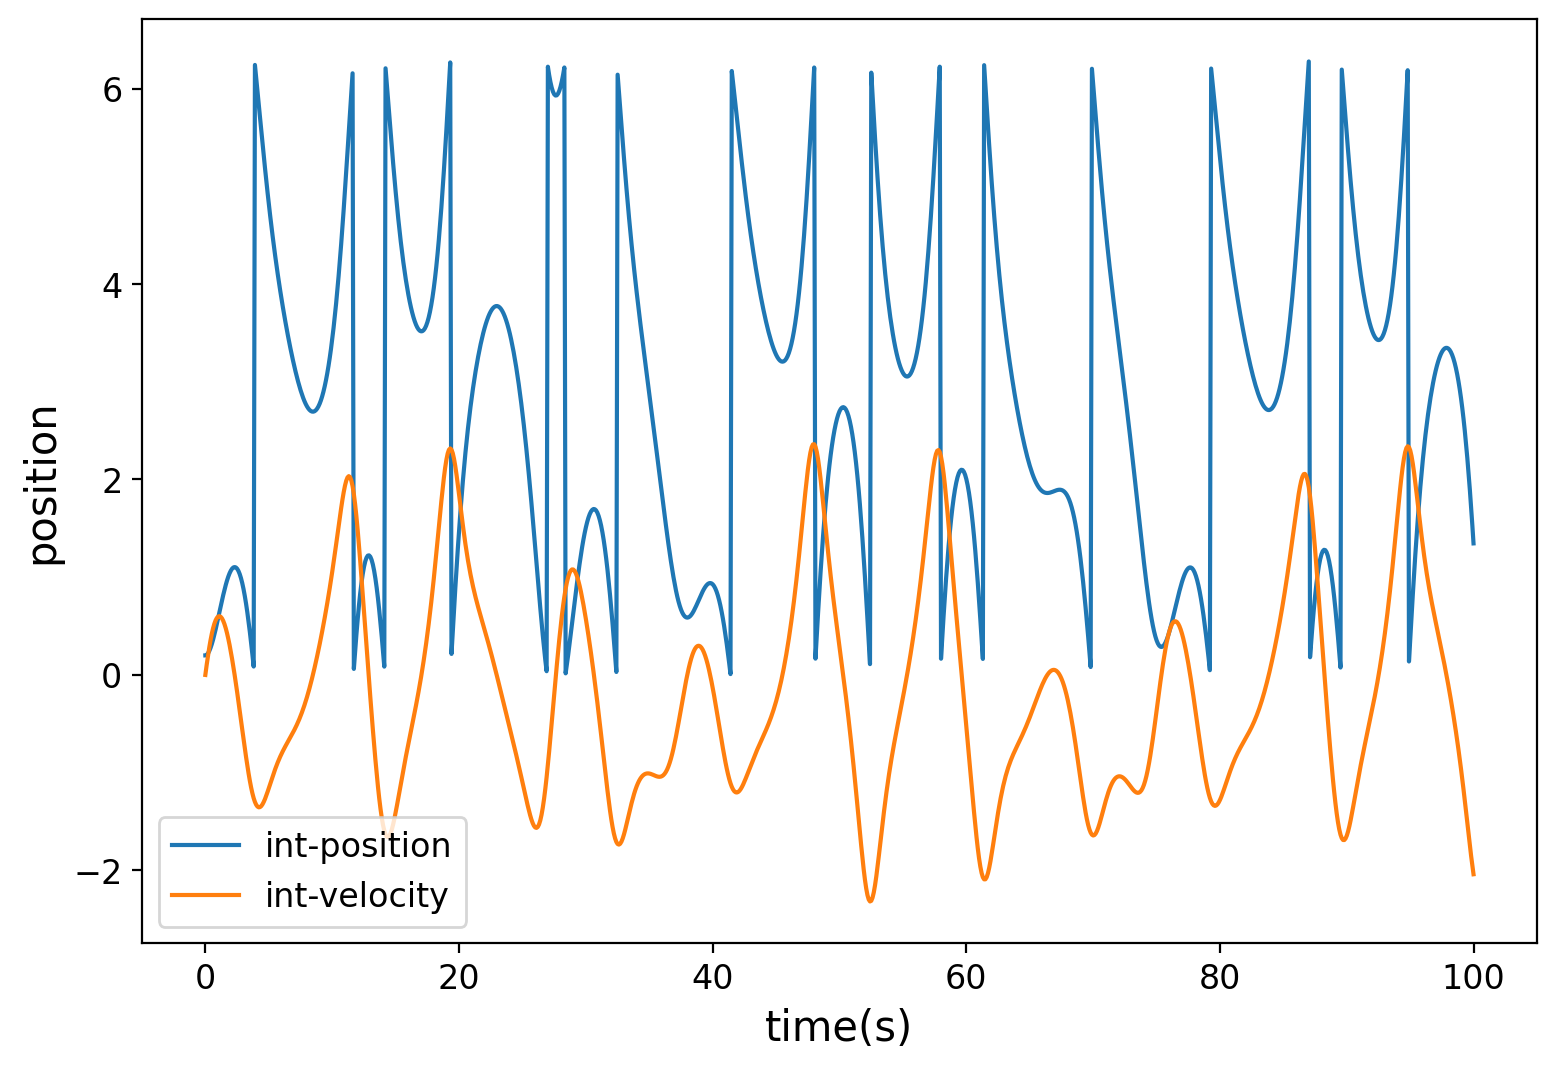

In [6]:
#>>>RUN: L18.1-runcell02

def df(t, thetavec, g, l, mup, fp, omega):
    theta, thetadot = thetavec
    return [thetadot, -(g/l) * np.sin(theta) - mup*thetadot + fp*np.cos(omega*t) ]

g=9.8
l=9.8
thetainit=0.2
mu=0.5
fp=1.2
omega=2./3.
solution = solve_ivp(df, [0., 100], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp,omega))

plt.plot(solution.t, solution.y[0] % (2*np.pi),label="int-position")
plt.plot(solution.t, solution.y[1],label="int-velocity")
plt.xlabel("time(s)")
plt.ylabel("position")
plt.legend()
plt.show()


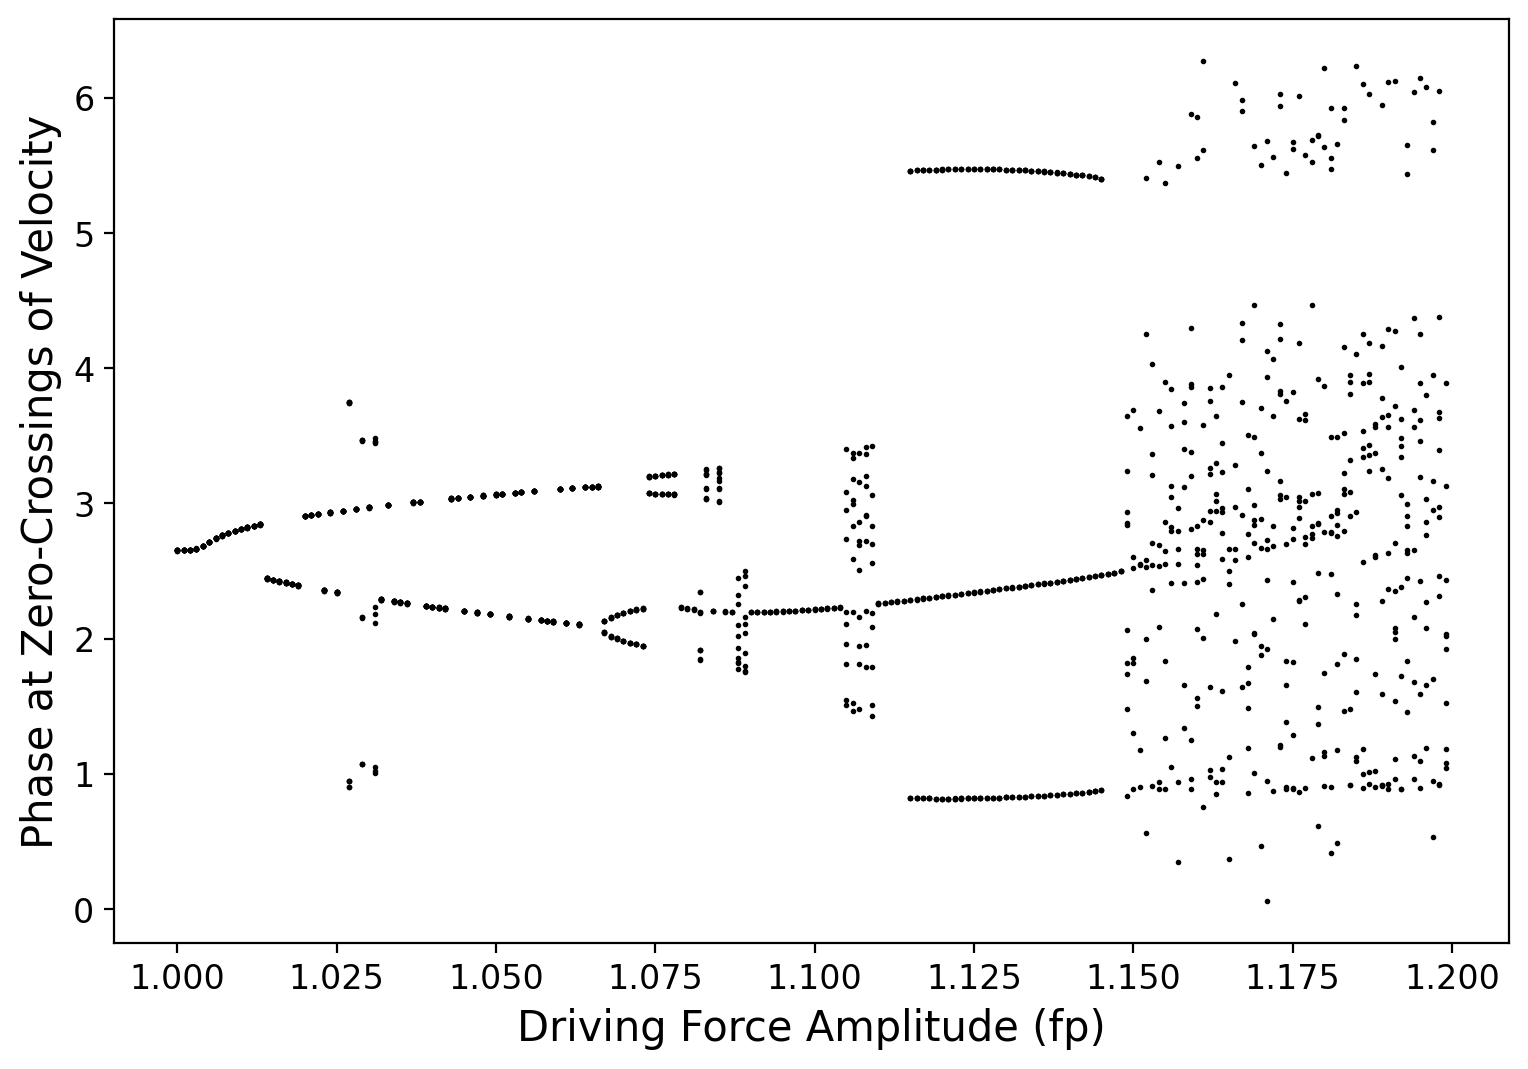

In [7]:
#>>>RUN: L18.1-runcell03

#NOTE: Running this code will take several minutes
#You can ignore the warning messages about redundant colors.

fp=1.0
thetainit=0.2
mu=0.5
g=9.8
l=9.8
omegad=2./3.
        
for scale in np.arange(1.0,1.2,0.001):
    fptrue=fp*scale
    solution = solve_ivp(df, [0., 1000], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fptrue,omegad))
    crossings = np.where((solution.y[1][-1000:][:-1]*solution.y[1][-1000:][1:]  <= 0)
                         & (solution.y[1][-1000:][:-1] - solution.y[1][-1000:][1:] > 0)
                        )[0]
    plt.plot(fptrue*np.ones(len(crossings)), (solution.y[0][-1000:][crossings] % (2*np.pi)),',k',c='black',marker=".",markersize=2)#, alpha=.25)

plt.xlabel("Driving Force Amplitude (fp)")
plt.ylabel("Phase at Zero-Crossings of Velocity")
plt.show()

<a name='exercises_18_1'></a>     

| [Top](#section_18_0) | [Restart Section](#section_18_1) | [Next Section](#section_18_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.1.1</span>

In a bifurcation diagram, the $x$ axis represents the values of the bifurcation parameter (generically called $r$ in this exercise), while the $y$ axis represents the values  of some property of the system. The diagram shows how the behavior of the system evolves as $r$ changes.

Features of a bifurcation diagram can include the following:

**Fixed Points and Stability:** If, for a particular $r$, the system converges to a stable value, it will be represented as a single point in the bifurcation diagram.

**Periodic Behavior:** The appearance of multiple points or regions in the bifurcation diagram is indicative of periodic behavior in the system. As $r$ varies, the system may transition from stable fixed points to periodic orbits and then to chaos.

**Bifurcation Points:** Bifurcation points are locations in the diagram where a qualitative change in the system's behavior occurs. This can manifest as a branching or splitting of trajectories.

**Period-Doubling Cascades:** Successive bifurcation points, leading to the doubling of the period of the system's behavior, are characteristic structures known as period-doubling cascades.

**Chaos:** Chaotic behavior is often observed in regions of the bifurcation diagram where the system exhibits an extremely sensitive dependence on the initial conditions.


Examine the bifurcation diagram below. Which item from the list below best characterizes the feature indicated by the arrow?

A) Fixed Point

B) Periodic Behavior

C) Bifurcation Point

D) Period-Doubling Cascade

E) Chaos

<p align="center">
<img alt="Chaotic Phase Space Plot" src="https://raw.githubusercontent.com/mitx-8s50/images/main/L18/chaotic_phase_space.png" width="600"/>
</p>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.1.2</span>

Now, take a more detailed look at the state of the system in the bifurcation diagram for the pendulum example, generated by code cell `L18.1-runcell03`. Make plots of position $\theta$ on the $x$ axis vs. velocity $\dot{\theta}$ on the $y$ axis, for two different values of `fp`, as follows: (1) `fp` corresponding to a stable point, and (2) a `fp` corresponding to a chaotic region. What behavior do you observe in the last 5000 steps of the simulation (after initial variation has subsided)?


A) Both plots follow repeating trajectories.\
B) One plot repeats itself, while the other fills a large fraction of the full phase space.\
C) Both plots fill a large fraction of the full phase space.


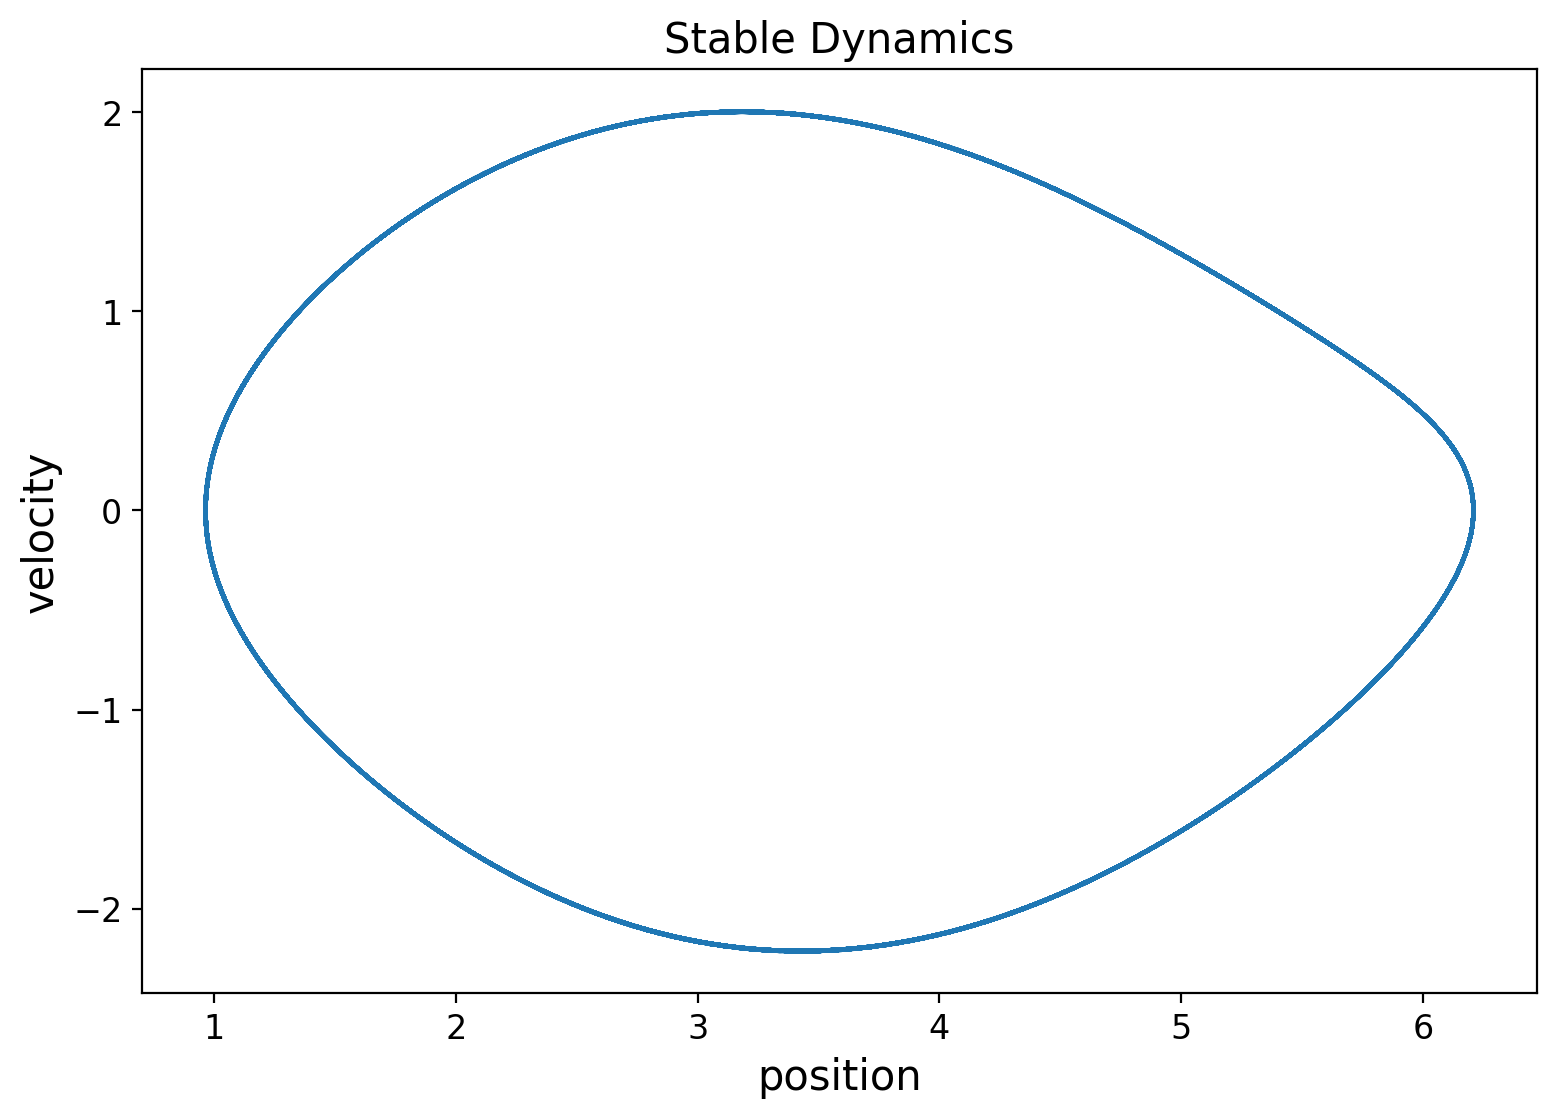

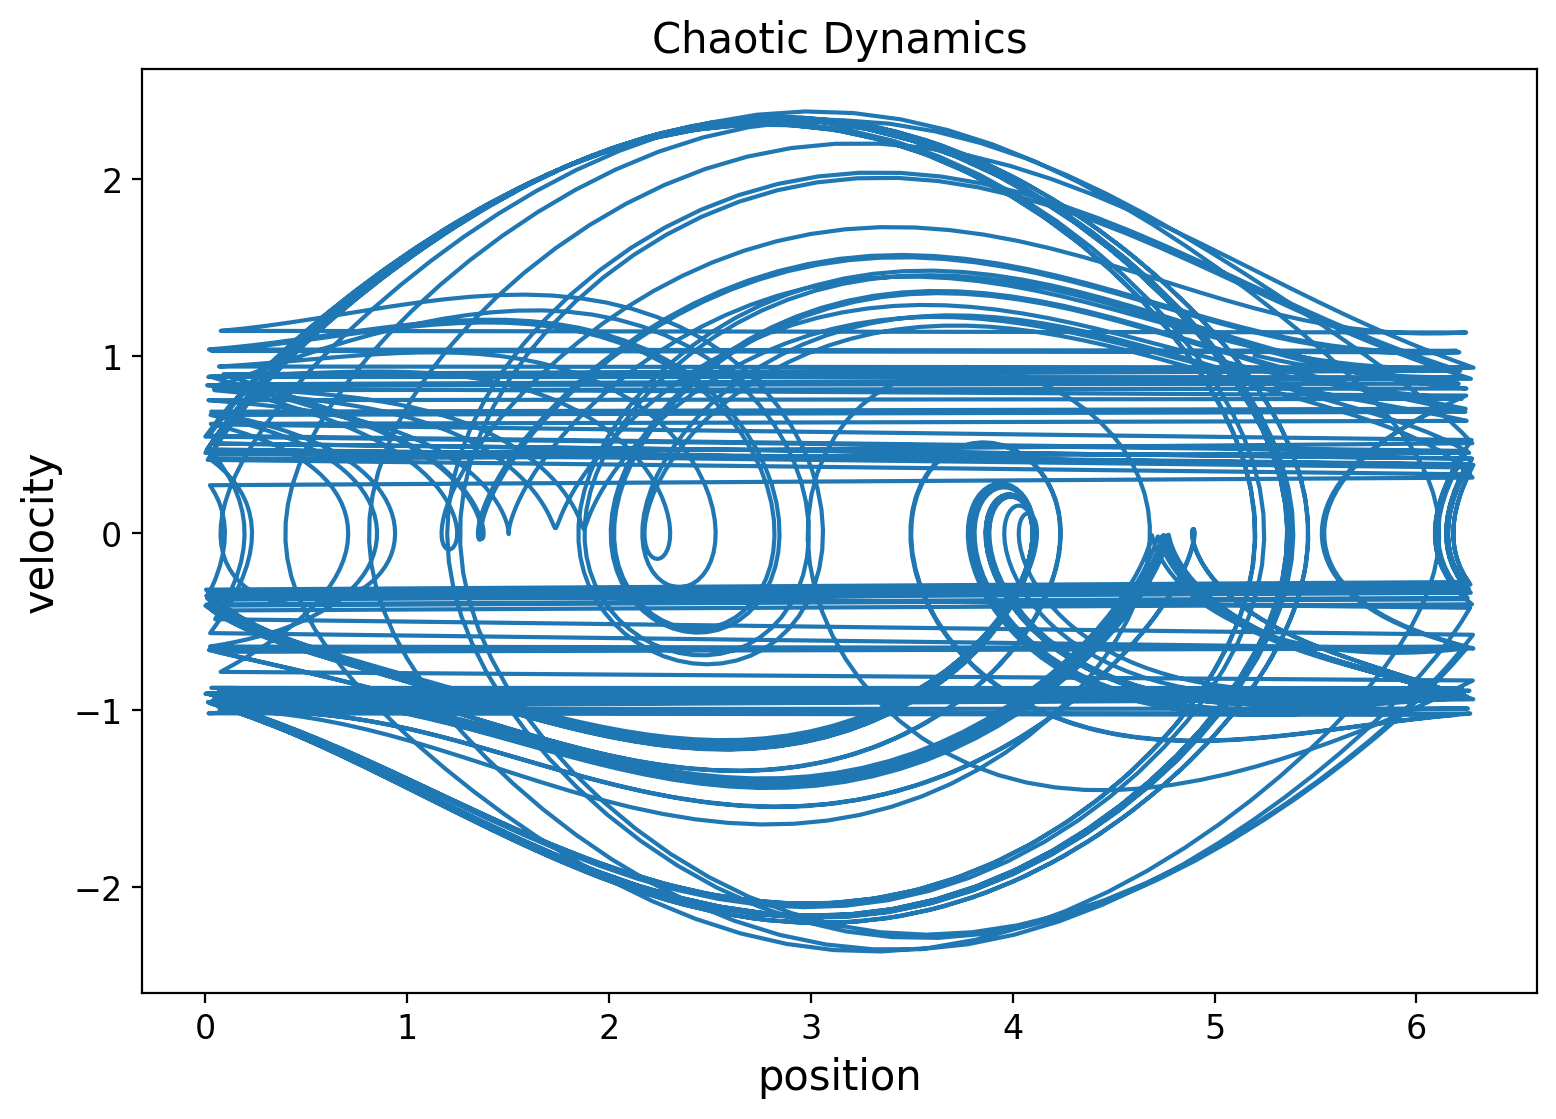

In [8]:
#>>>EXERCISE: L18.1.2

#plot 1: stable point
scale_stable = 1.05

solution = solve_ivp(df, [0., 100000*0.01], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp*scale_stable,omegad))
plt.plot((solution.y[0,-5000:] + np.pi) % (2*np.pi), solution.y[1,-5000:] ,label="int-position")
plt.xlabel("position")
plt.ylabel("velocity")
plt.title('Stable Dynamics')
plt.show()

#plot 2: chaotic region
scale_chaotic = 1.22

solution = solve_ivp(df, [0., 100000*0.01], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp*scale_chaotic,omegad))
plt.plot((solution.y[0,-5000:] + np.pi) % (2*np.pi), solution.y[1,-5000:] ,label="int-position")
plt.xlabel("position")
plt.ylabel("velocity")
plt.title('Chaotic Dynamics')
plt.show()


<a name='section_18_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L18.2 Numerical Precision and Chaotic Dynamics</h2>  

| [Top](#section_18_0) | [Previous Section](#section_18_1) | [Exercises](#exercises_18_2) | [Next Section](#section_18_3) |


[[ 0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-01 -9.93346654e-04]
 [ 1.99990067e-01 -2.97497587e-03]
 ...
 [-2.10683927e+00  4.19444594e-01]
 [-2.10264482e+00  4.32200284e-01]
 [-2.09832282e+00  4.44970221e-01]]


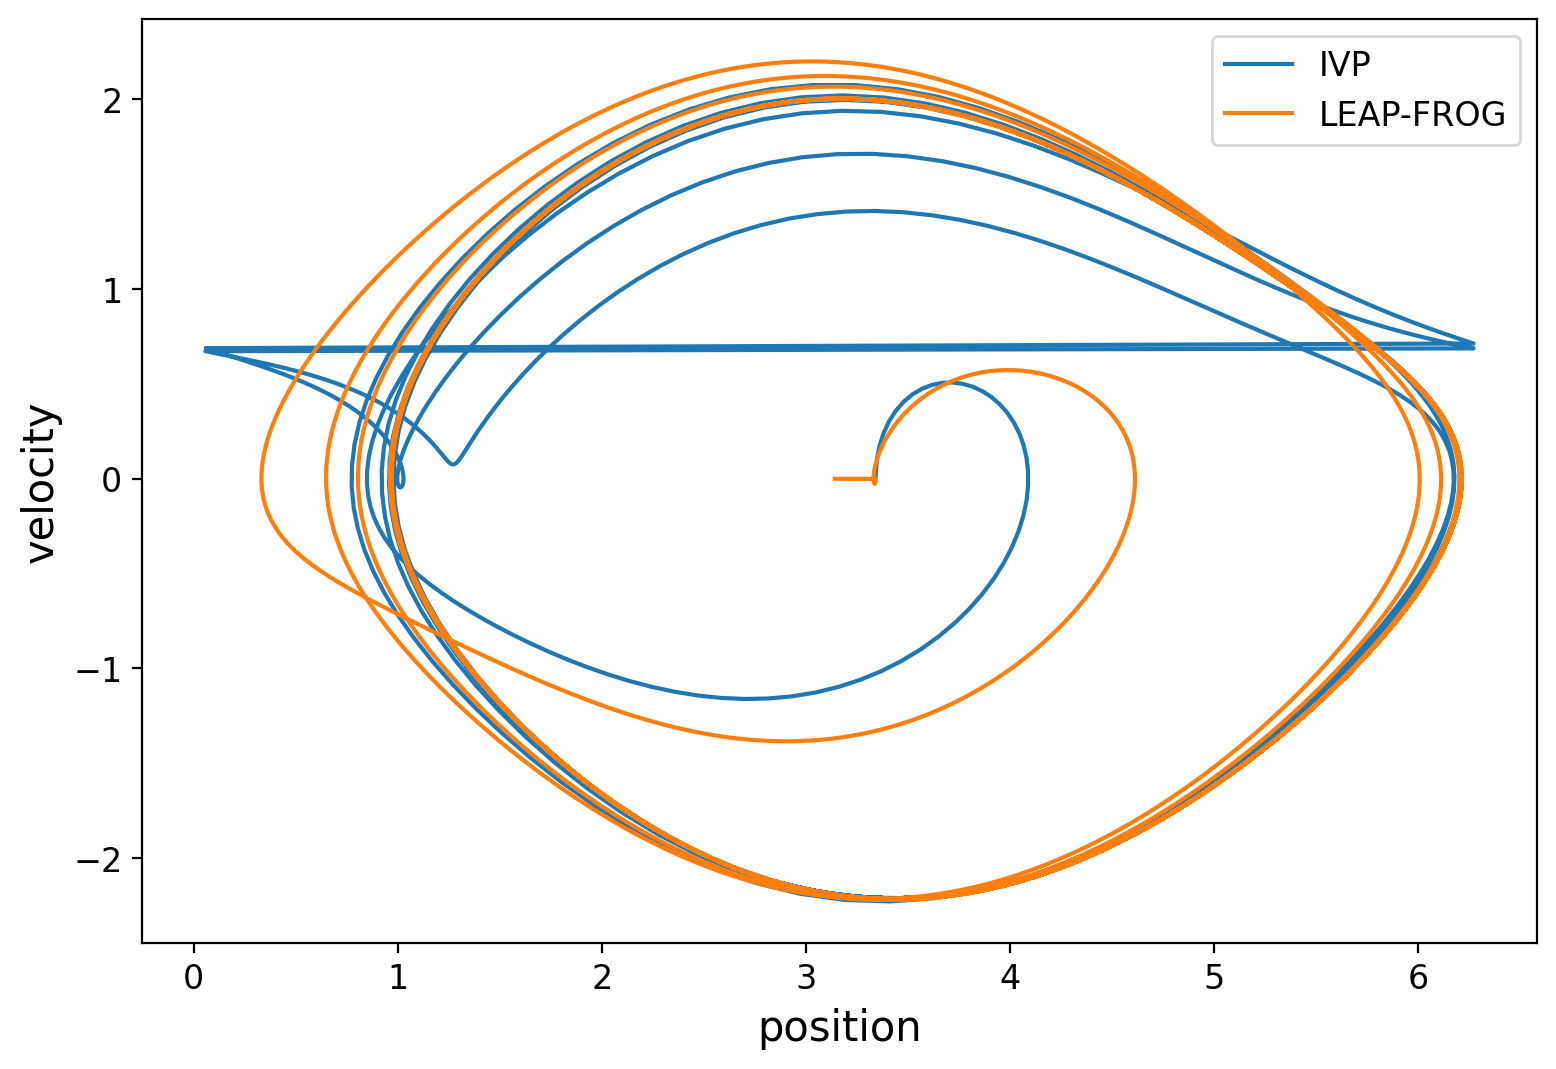

[[ 0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-01 -9.93346654e-04]
 [ 1.99990067e-01 -2.97497587e-03]
 ...
 [-6.48517465e+00  8.03367974e-01]
 [-6.47714097e+00  8.07928368e-01]
 [-6.46906169e+00  8.12446553e-01]]


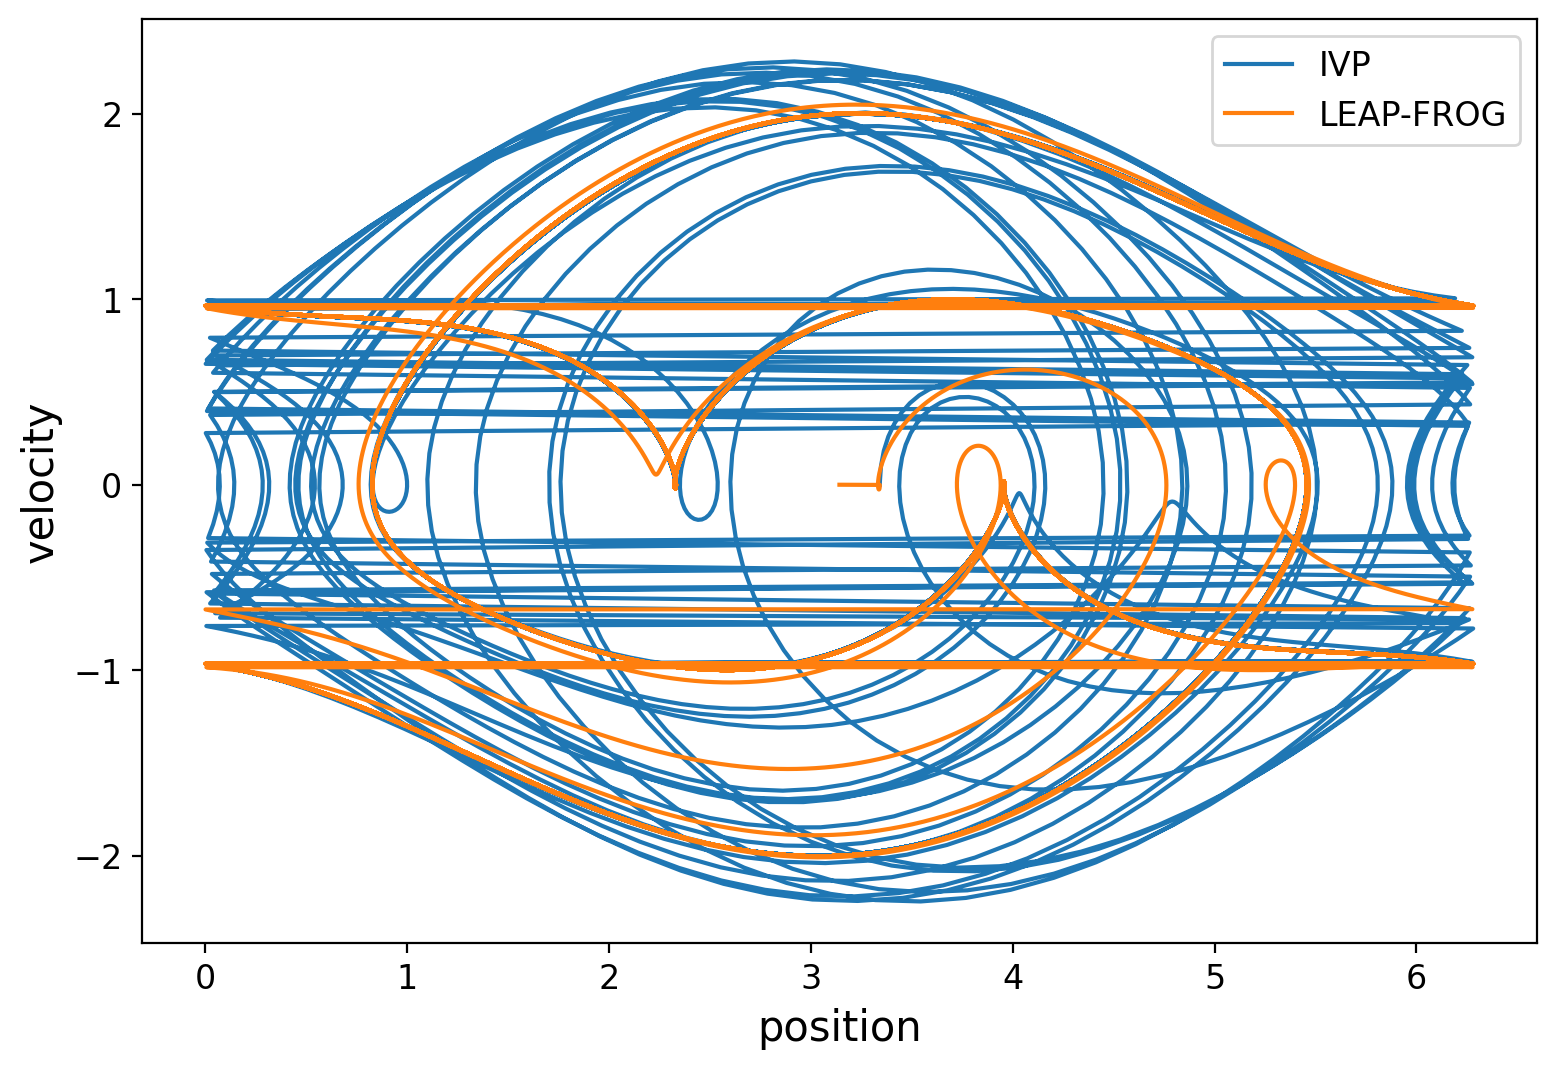

In [9]:
#>>>RUN: L18.2-runcell01

def store(theta,thetapos,time,timepos):
    thetapos = np.vstack((thetapos,theta))
    timepos  = np.vstack((timepos,time))
    return timepos,thetapos

def step(theta,t,dt,g,l,mu,f,omegad):
    theta[0] += theta[1] * dt 
    #theta[1] += (g/l)*(-1)*theta[0]*dt
    #print(((g/l)*(-1)*np.sin(theta[0])-mu*theta[1]+f*np.sin(omegad*t))*dt)
    theta[1] += ((g/l)*(-1)*np.sin(theta[0])-mu*theta[1]+f*np.sin(omegad*t))*dt
   
def loop(nsteps=1000,dt=0.01,g=9.8,l=9.8,mu=0.5,f=1.0,omegad=omegad):
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = thetainit #initial conditions
    theta[1] = 0.0
    theta[1] += ((g/l)*(-1)*np.sin(theta[0])-mu*theta[1]+f*np.sin(omegad*time))*dt*0.5
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        step(theta,time,dt,g,l,mu,f,omegad)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos

time,thetaout=loop(100000,dt=0.01,g=g,l=l,mu=mu,f=fp*1.05,omegad=omegad)
print(thetaout)
solution = solve_ivp(df, [0., 100000*0.01], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp*1.05,omegad))
plt.plot((solution.y[0] + np.pi) % (2*np.pi), solution.y[1] ,label="IVP")
plt.plot((thetaout[:,0] + np.pi) % (2*np.pi), thetaout[:,1] ,label="LEAP-FROG")
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend()
plt.show()

time,thetaout=loop(100000,dt=0.01,g=g,l=l,mu=mu,f=fp*1.12,omegad=omegad)
print(thetaout)
solution = solve_ivp(df, [0., 100000*0.01], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp*1.12,omegad))
plt.plot((solution.y[0] + np.pi) % (2*np.pi), solution.y[1] ,label="IVP")
plt.plot((thetaout[:,0] + np.pi) % (2*np.pi), thetaout[:,1] ,label="LEAP-FROG")
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend()
plt.show()

<a name='exercises_18_2'></a>     

| [Top](#section_18_0) | [Restart Section](#section_18_2) | [Next Section](#section_18_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.2.1</span>

Make a bifurcation diagram that is similar to the one produced by `L18.1-runcell03`, now using the Leap-Frog integrator (this will take a long time). Are the regions of stability, bifurcation, and choas the same? Choose an answer below:

A) No, the regions are entirely different and not at all similar.

B) Yes, the regions are identical.

C) The features are similar, but not identical.


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.2.2</span>

The purpose of a Poincaré section is to simplify the analysis of complex, high-dimensional systems by examining their behavior in a lower-dimensional space that is meaningful.

From the following options, select ALL answers which are valid examples of Poincaré sections:

A) A plane perpendicular to the trajectory of a swinging pendulum, intersecting the trajectory at each oscillation.

B) A random slice through the three-dimensional phase space of a chaotic system, capturing points at arbitrary locations.

C) A sphere enclosing the orbit of a satellite around a planet, capturing points as the satellite completes each orbit.

D) A plane tangential to the trajectory of a spinning top, capturing points as the top precesses.


<a name='section_18_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L18.3 Machine Learning the Pendulum Part I</h2>  

| [Top](#section_18_0) | [Previous Section](#section_18_2) | [Exercises](#exercises_18_3) | [Next Section](#section_18_4) |


In [10]:
#>>>RUN: L18.3-runcell01

def oscillator(d, w0, x):
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)
    y  = exp*A*cos
    return y

class MLP(nn.Module):    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN):
        super().__init__()
        activation = nn.Tanh
        self.input = nn.Sequential(
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()
                      )
        self.hidden = nn.Sequential(
                    nn.Linear(N_HIDDEN, N_HIDDEN),
                    activation(),
                    nn.Linear(N_HIDDEN, N_HIDDEN),
                    activation(),
                    nn.Linear(N_HIDDEN, N_HIDDEN),
                    activation(),        
                    )

        self.output = nn.Linear(N_HIDDEN, N_OUTPUT)
        #self.fcs = nn.Sequential(*[nn.Linear(N_INPUT, N_HIDDEN),activation()])
        #self.fch = nn.Sequential(*[nn.Sequential(*[nn.Linear(N_HIDDEN, N_HIDDEN),activation()]) for _ in range(N_LAYERS-1)])
        #self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.input(x)
        x = self.hidden(x)
        x = self.output(x)
        return x
    


torch.Size([10, 1]) torch.Size([10, 1])


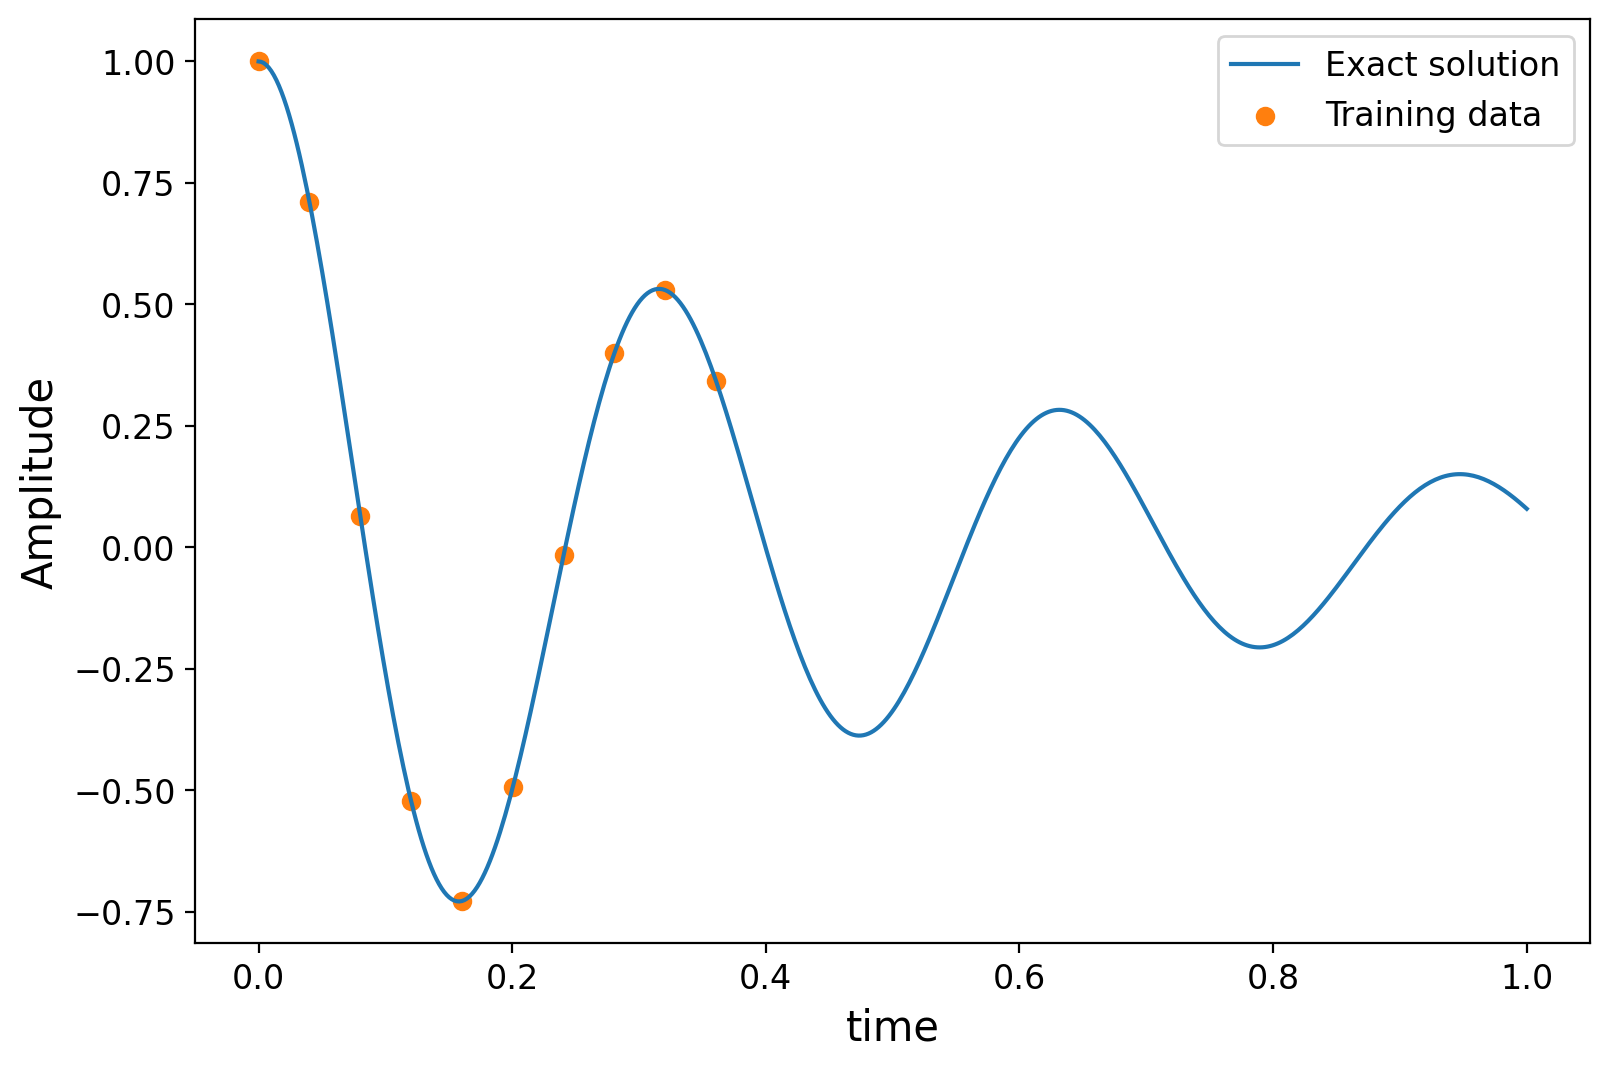

In [11]:
#>>>RUN: L18.3-runcell02

d, w0 = 2, 20

# get the analytical solution over the full domain
x = torch.linspace(0,1,500).view(-1,1)
y = oscillator(d, w0, x).view(-1,1)

# slice out a small number of points from the LHS of the domain
x_data = x[0:200:20] # take just one event every 20th from 0 to 200
y_data = y[0:200:20]
print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

0.2892819046974182
0.07544885575771332
0.0443282388150692
0.01154524926096201
0.0017704848432913423
0.000883426982909441
0.00040738959796726704
0.0001620436378289014
7.21113319741562e-05
4.41815318481531e-05


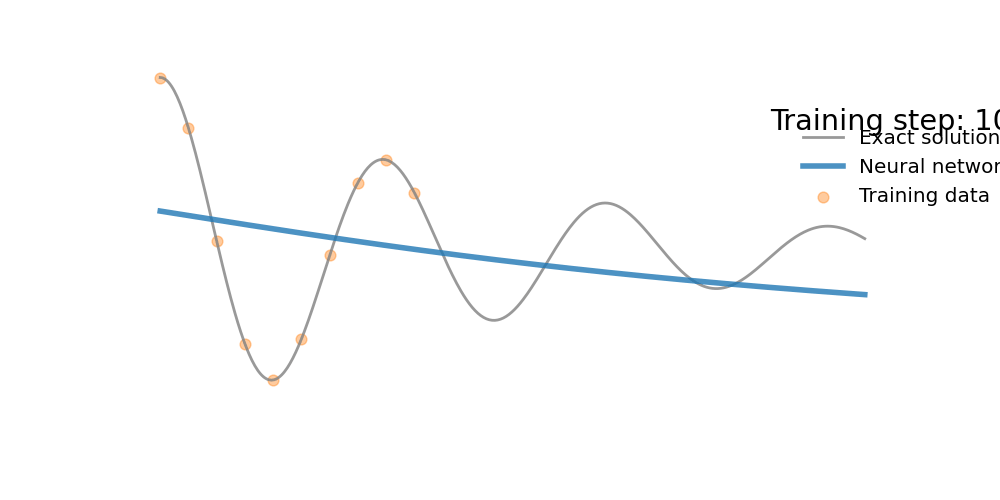

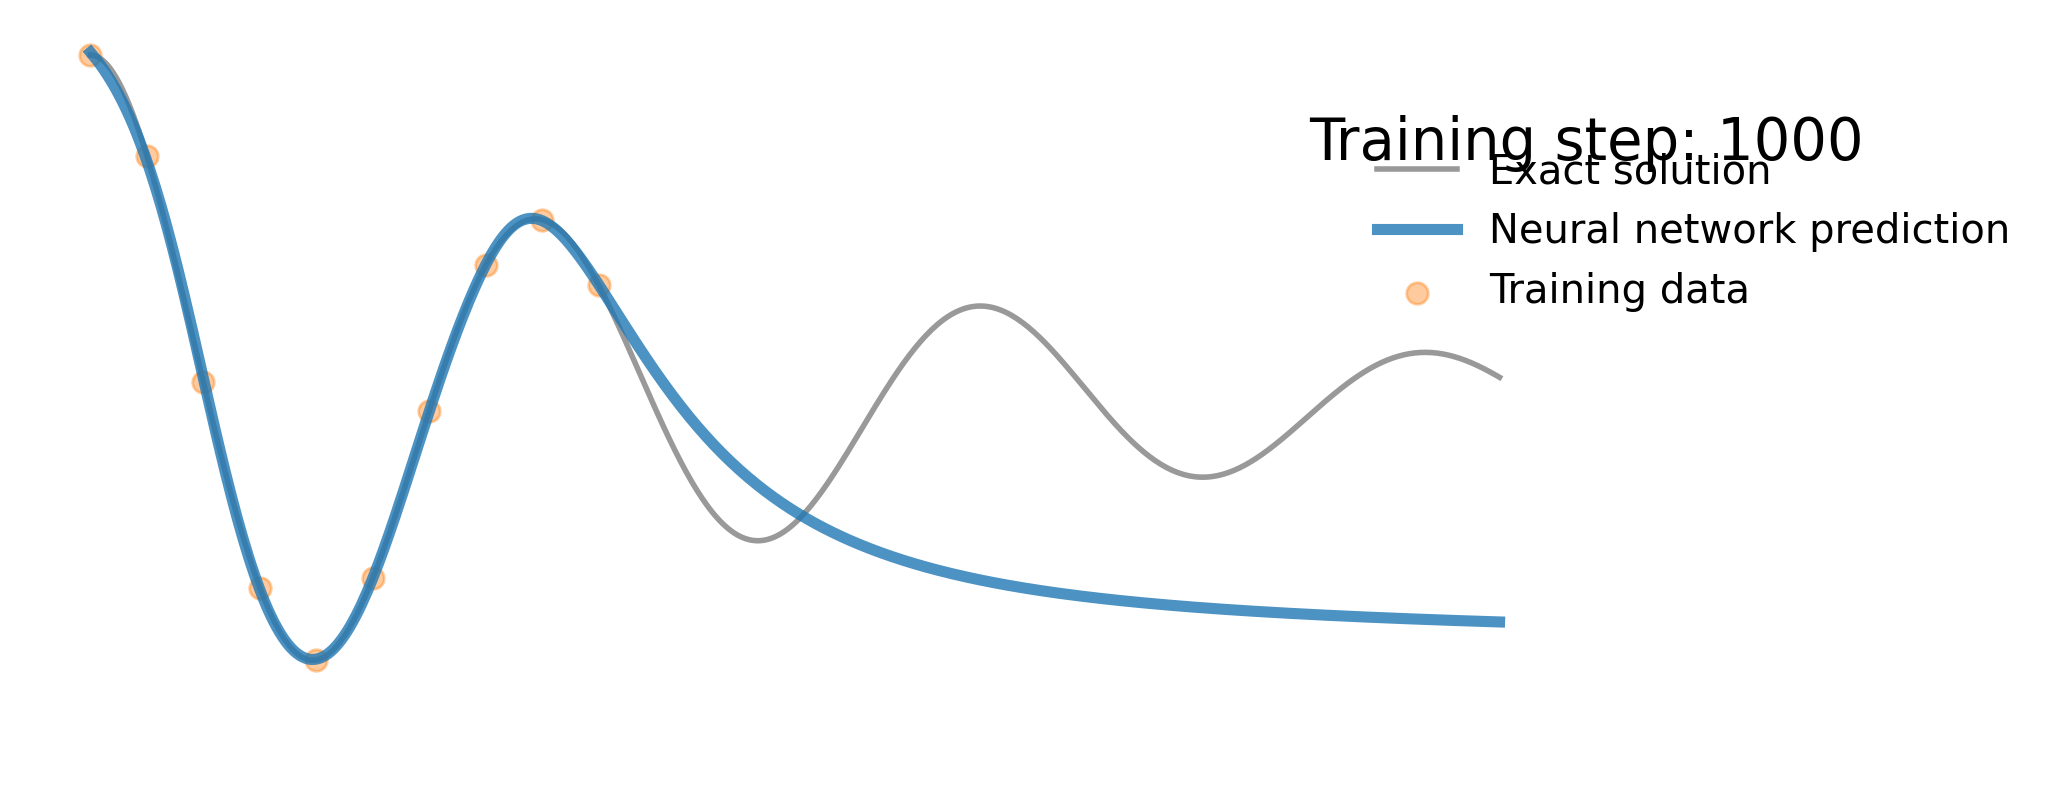

In [12]:
#>>>RUN: L18.3-runcell03

def plot_result(x,y,x_data,y_data,yh,fig,ax,images=[],xp=None):
    plt.cla()
    plt.plot(x,y, color="grey", linewidth=2, alpha=0.8, label="Exact solution")
    plt.plot(x,yh, color="tab:blue", linewidth=4, alpha=0.8, label="Neural network prediction")
    plt.scatter(x_data, y_data[:,0], s=60, color="tab:orange", alpha=0.4, label='Training data')
    if xp is not None:
        plt.scatter(xp, -0*torch.ones_like(xp), s=60, color="tab:green", alpha=0.4, 
                    label='Physics loss training locations')
    l = plt.legend(loc=(0.865,0.60), frameon=False, fontsize="large")
    plt.setp(l.get_texts(), color="k")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.1, 1.1)
    plt.text(0.865,0.7,"Training step: %i"%(i+1),fontsize="xx-large",color="k")
    plt.axis("off")
    fig.canvas.draw() 
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

    
# train standard neural network to fit training data
torch.manual_seed(123)
model = MLP(1,1,32)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
images = []
fig, ax = plt.subplots(figsize=(10,5))
y_data=torch.hstack((y_data,torch.ones(10,1)))

for i in range(1000):
    optimizer.zero_grad()
    yh = model(x_data)
    loss = torch.mean((yh[:,0:1]-y_data[:,0:1])**2)# use mean squared error
    loss.backward()
    optimizer.step()
    
    # plot the result as training progresses
    if (i+1) % 100 == 0: 
        print(loss.item())
        yh = model(x).detach()
        plot_result(x,y,x_data,y_data,yh,fig,ax,images)

imageio.mimsave('data/L18/training.gif', images, fps=10, loop=0)
Image(open('data/L18/training.gif','rb').read())
#NOTE: gifs can be opened in COLAB by double-clicking file in related `data` directory

<a name='exercises_18_3'></a>     

| [Top](#section_18_0) | [Restart Section](#section_18_3) | [Next Section](#section_18_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.3.1</span>

Add 5 data points to the data set, corresponding to evenly spaced points sampled from the LAST 100 points, and re-run the neural network above. What is the last loss value that is printed? Report your new answer as a number with precision `1e-5`.

Does the NN do a better job at fitting when using additional data from the end of the dataset?

0.2009521871805191
0.17170873284339905
0.026864198967814445
0.007603858131915331
0.003910190425813198
0.0008164040627889335
0.0005900897085666656
0.0004703168524429202
0.000408376072300598
0.0003144397051073611


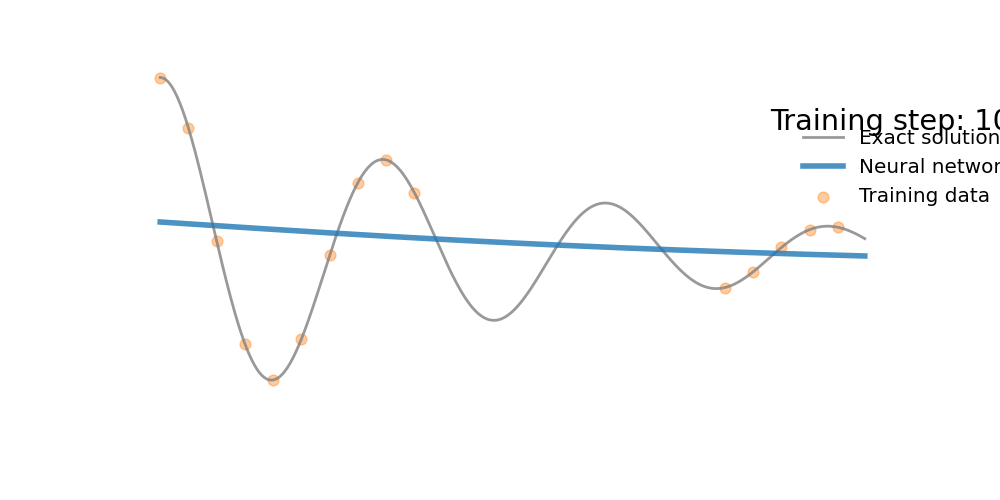

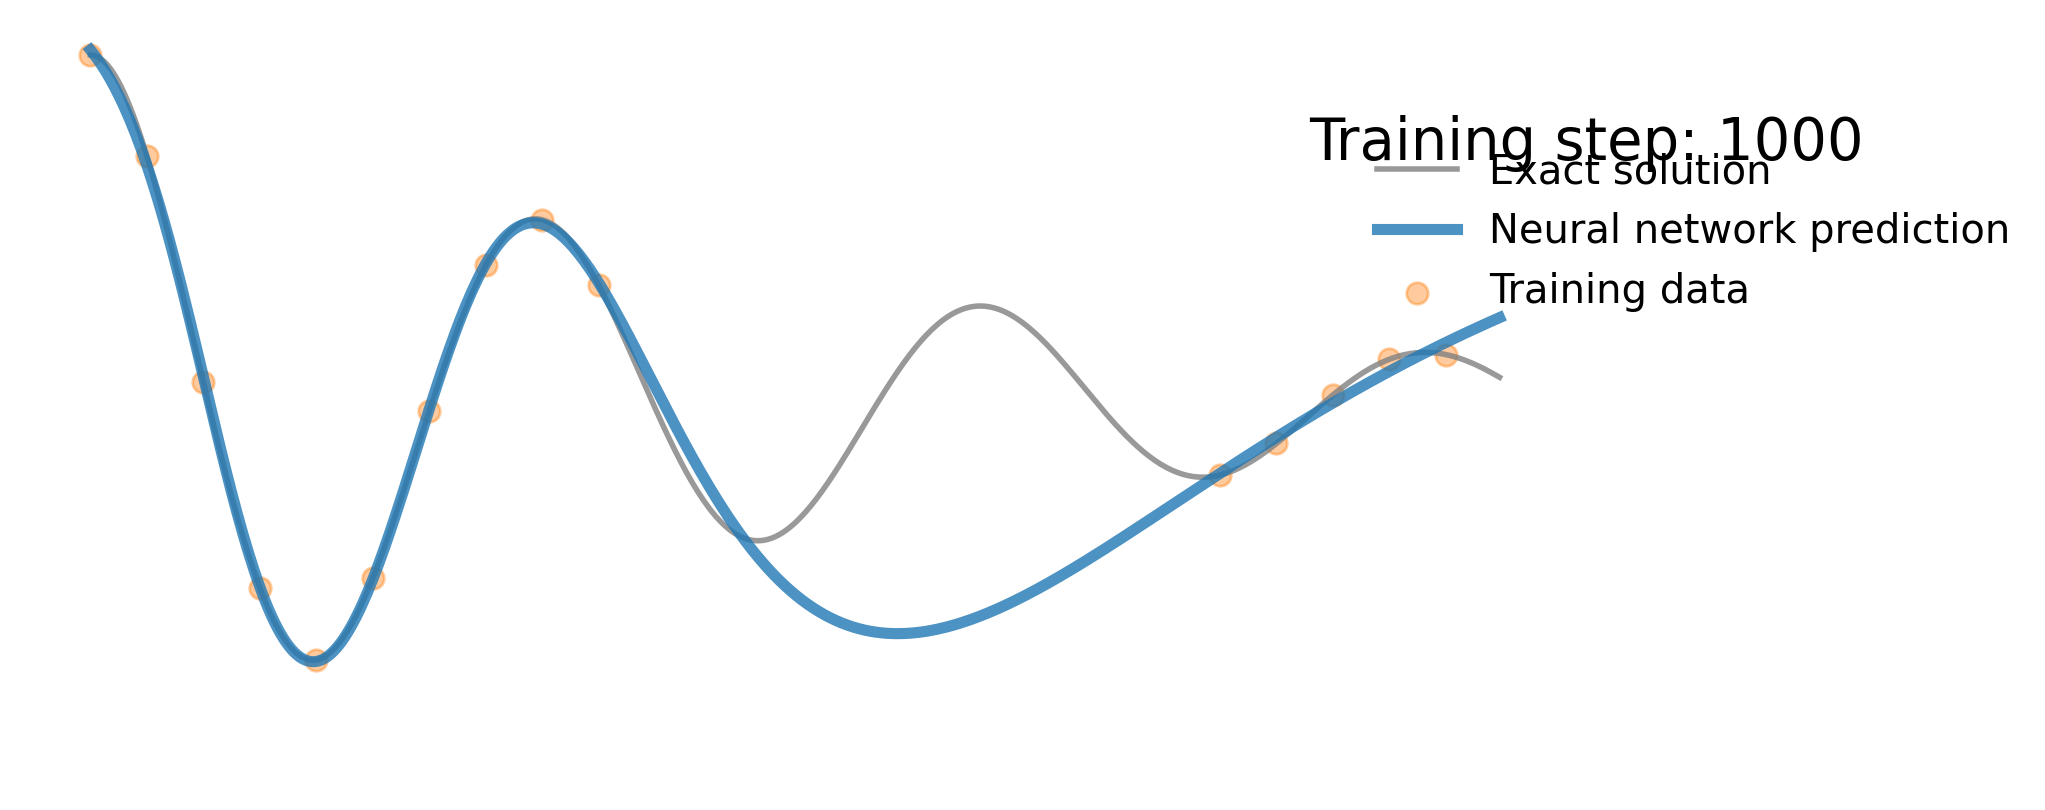

In [13]:
#>>>EXERCISE: L18.3.1

#combine the original data set and last 5 evenly-spaced points
x_data = torch.vstack((x[0:200:20],x[-100:-1:20]))
y_data = torch.vstack((y[0:200:20],y[-100:-1:20]))

    
#RUN THE NN AGAIN
torch. manual_seed (123)
model = MLP (1,1,32)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
images = []
fig, ax = plt.subplots(figsize=(10,5))
y_data=torch.hstack((y_data,torch.ones(15,1)))
for i in range (1000):
    optimizer.zero_grad()
    yh = model (x_data)
    loss = torch.mean ((yh[:,0:1]-y_data[:,0:1])**2)# use mean squared error
    loss. backward()
    optimizer.step ()

    # plot the result as training progresses
    if (i+1) % 100 == 0:
        print(loss.item())
        yh = model(x).detach()
        plot_result(x,y, x_data, y_data, yh, fig, ax, images)
    

imageio.mimsave('data/L18/training2.gif', images, fps=10, loop=0)
Image(open('data/L18/training2.gif','rb').read())
#NOTE: gifs can be opened in COLAB by double-clicking file in related `data` directory
    

<a name='section_18_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L18.4 Machine Learning the Pendulum Part II</h2>  

| [Top](#section_18_0) | [Previous Section](#section_18_3) | [Exercises](#exercises_18_4) |


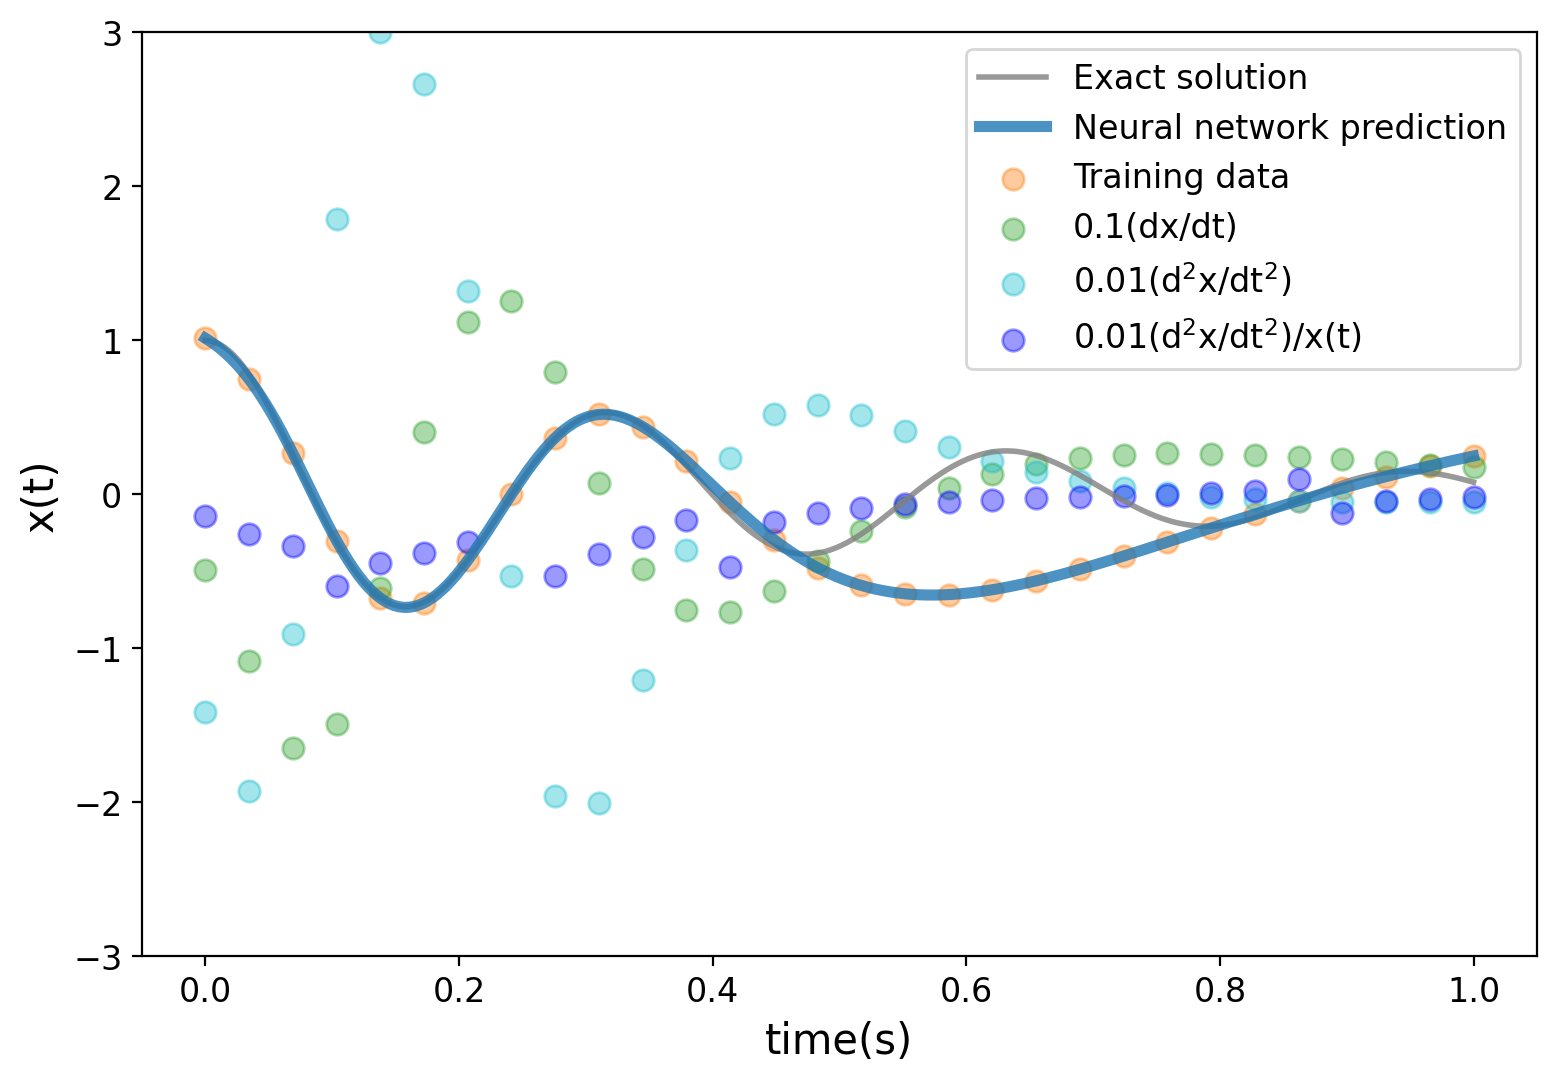

In [14]:
#>>>RUN: L18.4-runcell01

#First let's apply the model
x_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)# sample locations over the problem domain
yhp = model(x_physics)
dx  = torch.autograd.grad(yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]# computes dy/dx
dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2y/dx^2
dx*=0.1
dx2*=0.01
plt.plot(x,y, color="grey", linewidth=2, alpha=0.8, label="Exact solution")
plt.plot(x,yh, color="tab:blue", linewidth=4, alpha=0.8, label="Neural network prediction")
plt.scatter(x_physics.detach(), yhp.detach().numpy(), s=60, color="tab:orange", alpha=0.4, label='Training data')
plt.scatter(x_physics.detach(), dx.detach(), s=60, color="tab:green", alpha=0.4, label='0.1(dx/dt)')
plt.scatter(x_physics.detach(), dx2.detach(), s=60, color="tab:cyan", alpha=0.4, label='0.01(d$^{2}$x/dt$^{2}$)')
plt.scatter(x_physics.detach(), 0.1*dx2.detach()/yhp.detach(), s=60, color="blue", alpha=0.4, label='0.01(d$^{2}$x/dt$^{2}$)/x(t)')
plt.ylim(-3,3)
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("x(t)")
plt.show()

#note, your results may look slightly different than the related video,
#if you just retrained the NN in Exercise 18.3.1

0.3083895146846771
0.3082606792449951
0.3080860674381256
0.3078640401363373
0.30759403109550476
0.3072910010814667
0.3069947361946106
0.3067368268966675
0.306478887796402
0.306130051612854
0.3055454194545746
0.3043949007987976
0.30219653248786926
0.29939958453178406
0.2970486283302307
0.2945443093776703
0.2910297214984894
0.2840481996536255
0.26453396677970886
0.2208743840456009
0.19534242153167725
0.1877327859401703
0.17389878630638123
0.14121124148368835
0.09582772850990295
0.06981416046619415
0.056231215596199036
0.047790899872779846
0.04198036342859268
0.036454688757658005
0.02974659577012062
0.02608124539256096
0.024293964728713036
0.02314697578549385
0.022395264357328415
0.021831849589943886
0.021360546350479126
0.020924458280205727
0.020484380424022675
0.01985747739672661
0.019023537635803223
0.01795763336122036
0.01650007627904415
0.014672903344035149
0.012725231237709522
0.011222321540117264
0.010198533535003662
0.009458072483539581
0.00882651936262846
0.008292503654956818
0.0

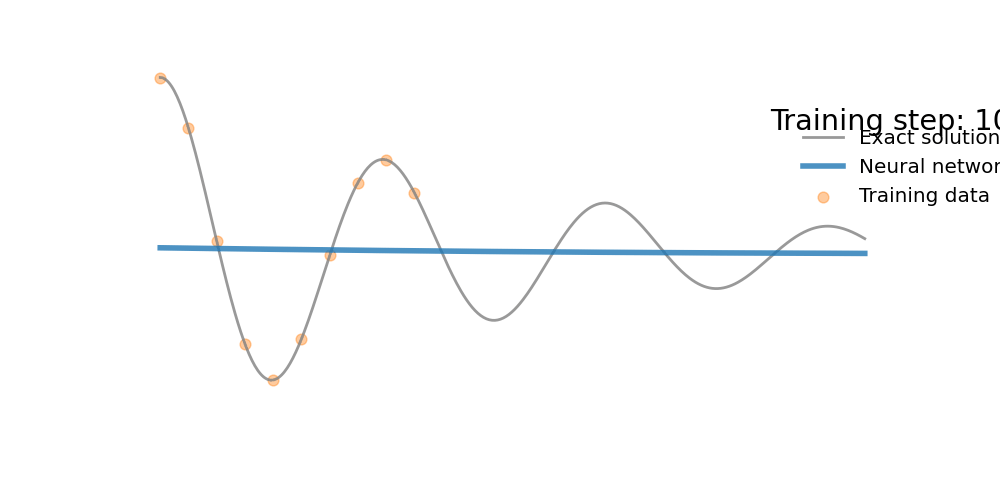

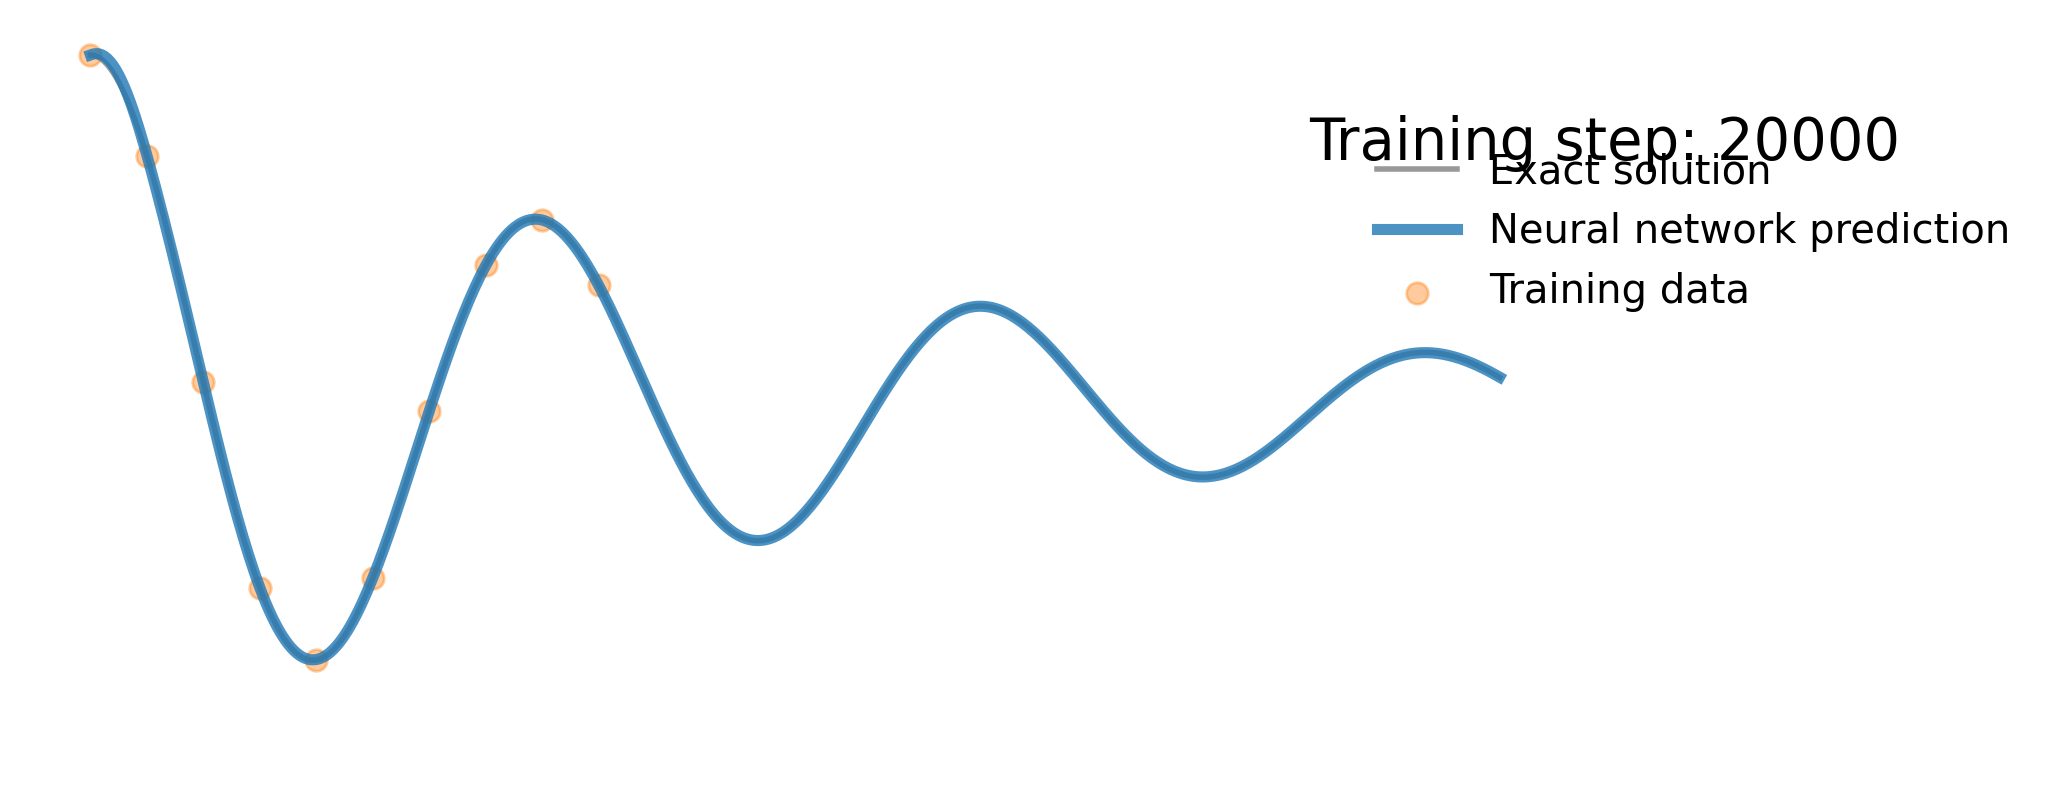

In [15]:
#>>>RUN: L18.4-runcell02

#x_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)# sample locations over the problem domain
mu, k = 2*d, w0**2
model = MLP(1,1,32)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

#Back to the origin data arrays that we were using before
x_data = x[0:200:20] # take just one event every 20th from 0 to 200
y_data = y[0:200:20]

torch.manual_seed(123)
images = []
fig, ax = plt.subplots(figsize=(10,5))
for i in range(20000):
    optimizer.zero_grad()
    
    # compute the "data loss"
    yh = model(x_data)
    loss1 = torch.mean((yh[:,0:1]-y_data[:,0:1])**2)# use mean squared error

    # compute the "physics loss"
    yhp = model(x_physics)
    dx  = torch.autograd.grad(yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]# computes dy/dx
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2y/dx^2
    physics = dx2 +  mu*dx +  k*yhp# computes the residual of the 1D harmonic oscillator differential equation
    loss2 = (1e-4)*torch.mean(physics**2)  #Note the multiplicative factor!
    
    # backpropagate joint loss
    loss = loss1 + loss2# add two loss terms together
    loss.backward()
    optimizer.step()
    
    
    # plot the result as training progresses
    if (i+1) % 100 == 0: 
        
        yh = model(x).detach()
        xp = x_physics.detach()

        print(loss.item())
        yh = model(x).detach()
        plot_result(x,y,x_data,y_data,yh,fig,ax,images)

from IPython.display import Image
a=imageio.mimsave('data/L18/training.gif', images, fps=10, loop=0)
Image(open('data/L18/training.gif','rb').read())
#NOTE: gifs can be opened in COLAB by double-clicking file in related `data` directory

In [ ]:
#>>>RUN: L18.4-runcell03

#x_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)# sample locations over the problem domain
mu, k = 2*d, w0**2
model1 = MLP(1,1,32)
model2 = MLP(1,2,1)
#model2.Train = False

optimizer1 = torch.optim.Adam(model1.parameters(),lr=1e-4)
optimizer2 = torch.optim.Adam(model2.parameters(),lr=1e-2)

torch.manual_seed(123)
images = []
fig, ax = plt.subplots(figsize=(10,5))
for i in range(50000):
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    
    # compute the "data loss"
    yh = model1(x_data)
    loss1 = torch.mean((yh[:,0:1]-y_data[:,0:1])**2)# use mean squared error

    # compute the "physics loss"
    yhp   = model1(x_physics)
    decay = model2(x_physics)
    dx  = torch.autograd.grad(yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]# computes dy/dx
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2y/dx^2
    physics = dx2 +  torch.mean(decay[:,0:1])*dx +  torch.mean(decay[:,1:2])*yhp# computes the residual of the 1D harmonic oscillator differential equation
    loss2 = (1e-4)*torch.mean(physics**2)
    
    # backpropagate joint loss
    loss = loss1 + loss2# add two loss terms together
    loss.backward()
    optimizer1.step()
    optimizer2.step()
    
    
    # plot the result as training progresses
    if (i+1) % 100 == 0: 
        
        yh = model1(x).detach()
        xp = x_physics.detach()

        print(loss.item())
        yh = model1(x).detach()
        plot_result(x,y,x_data,y_data,yh,fig,ax,images)

from IPython.display import Image
a=imageio.mimsave('data/L18/training.gif', images, fps=10, loop=0)
Image(open('data/L18/training.gif','rb').read())
#NOTE: gifs can be opened in COLAB by double-clicking file in related `data` directory

0.29428762197494507
0.2930077612400055
0.2919343113899231
0.29112303256988525
0.2904277443885803
0.2895473837852478
0.2881774306297302
0.2857652008533478
0.28085291385650635
0.269225537776947
0.23717717826366425
0.17884616553783417
0.1595655381679535
0.1566423773765564
0.1547738015651703
0.1528778076171875
0.15050344169139862
0.14711853861808777
0.14194712042808533
0.13817621767520905
0.1356182098388672
0.13357387483119965
0.1318386346101761
0.13031277060508728
0.12893207371234894
0.1276533007621765
0.12644779682159424
0.12529534101486206
0.12417997419834137
0.12309348583221436
0.12203893065452576
0.1209699809551239
0.11992098391056061
0.11887429654598236
0.11782278120517731
0.11676417291164398
0.11569467931985855
0.11461125314235687
0.11351470649242401
0.11240364611148834
0.11127969622612
0.1101418137550354
0.10899312794208527
0.10783199965953827
0.1066613495349884
0.10548049956560135
0.10429385304450989
0.10309972614049911
0.10190180689096451
0.10070116817951202
0.09949745237827301
0

0.0023313630372285843
0.0023291870020329952
0.002323098247870803
0.002320084720849991
0.002315032295882702
0.002310974057763815
0.002306773792952299
0.0023035076446831226
0.0022997953929007053
0.002306834328919649
0.002289519412443042
0.002287411829456687
0.0022805077023804188
0.002276000566780567
0.0023368834517896175
0.00226773414760828
0.002335113938897848
0.002256142906844616
0.0022505042143166065
0.0022451472468674183
0.0022392980754375458
0.0022339203860610723


In [ ]:
#>>>RUN: L18.4-runcell04

decays=model2(x_physics)
print("NN Mu:",decays[0][0].detach().numpy(),"Actual:",mu,"NN k: ",decays[0][1].detach().numpy(),"Actual:",k)

<a name='exercises_18_4'></a>     

| [Top](#section_18_0) | [Restart Section](#section_18_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 18.4.1</span>

Again, add 5 data points to the data set, corresponding to evenly spaced points sampled from the LAST 100 points, and re-run the neural network above. How does this change the final value of the decay parameter? Report your new result for $\mu$, as a number with precision `1e-3`.

Before running your solution code, think a bit about what you expect will happen.

In [ ]:
#>>>EXERCISE: L18.4.1

n=len (x)
#combine the original data set and last 5 evenly-spaced points
x_data = torch.vstack((x[0:200:20],x[n-100:-1:20]))
y_data = torch.vstack((y[0:200:20],y[n-100:-1:20]))
print(x_data.shape, y_data.shape)

    
#RUN THE NN AGAIN
#YOUR CODE HERE
model1 = MLP(1,1,32)
model2 = MLP (1,2,1)
#model2.Train = False

optimizer1 = torch.optim.Adam(model1.parameters(),lr=1e-4)
optimizer2 = torch.optim.Adam(model2.parameters(),lr=1e-2)

torch. manual_seed (123)
images = []
fig, ax = plt.subplots(figsize=(10,5))
for i in range (50000):
    optimizer1.zero_grad() 
    optimizer2.zero_grad()
    
    # compute the "data loss"
    yh = model1(x_data)
    loss1 = torch.mean ((yh[:,0:1]-y_data[:,0:1])**2)# use mean squared error
    
    # compute the "physics loss"
    yhp = model1(x_physics)
    decay = model2(x_physics)
    
    # computes dy/dx
    dx = torch.autograd.grad (yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]
    
    #computes d'2y/dx^2
    dx2 = torch.autograd.grad (dx, x_physics, torch.ones_like(dx), create_graph=True)[0]
    physics = dx2 + torch.mean (decay[:,0:11])*dx + torch.mean (decay[:, 1:2])*yhp
                                      
    # computes the residual of the 1D harmonic oscillator differential equation
    loss2 = (1e-4)*torch.mean(physics**2)

    # backpropagate joint loss
    loss = loss1 + loss2 # add two loss terms together
    loss. backward()
    optimizer1.step ()
    optimizer2.step ()
    
    # plot the result as training progresses
    if (i+1) % 500 == 0:
        yh = model1(x) .detach ()
        xp = x_physics.detach ()
        
        if (i+1) % 1000 == 0:
            print(loss.item())
        
        yh = model1(x).detach()
        plot_result(x, y, x_data, y_data, yh,fig,ax, images)

from IPython.display import Image
a=imageio.mimsave( 'data/L18/training gif', images, fps=10, loop=0)
Image (open ('data/L18/training gif', 'rb'). read ( ))

#NOTE: gifs can be opened in COLAB by double-clicking file in related 'data directory
        
#print the parameters  
decays=model2(x_physics)
print("NN Mu:",decays[0][0].detach().numpy(),"Actual:",mu,"NN k: ",decays[0][1].detach().numpy(),"Actual:",k)

In [ ]:
#print the parameters  
decays=model2(x_physics)
print("NN Mu:",decays[0][0].detach().numpy(),"Actual:",mu,"NN k: ",decays[0][1].detach().numpy(),"Actual:",k)